In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
output = 'figures/'
plt.rcParams["figure.figsize"] = (10,7)

In [3]:
def sst(T, h):
    return (R*T + gama*h-epsilon*(h+b*T)**3 + gama* xi)
def thermo(T,h):
    return (-r*h -alpha*b*T-alpha*xi)
def rungeKutta(T,h):
    "Apply Runge Kutta Formulas to find next value of T and h"
    k1 =  sst(T, h)
    kk1 =  thermo(T, h)
    
    k2 =  sst(T + dt*0.5 * k1, h + dt*0.5 * kk1 )
    kk2 = thermo(T + dt*0.5 * k1, h + dt*0.5 * kk1 )
    
    k3 =  sst(T + dt*0.5 * k2, h + dt*0.5 *kk2  )
    kk3 = thermo(T + dt*0.5 * k2, h + dt*0.5 * kk2 )
    
    k4 = sst(T + dt*k3, h + dt*kk3 )
    kk4 = thermo(T + dt*k3, h + dt*kk3 )
    # Update next value of T
    T = T + (1.0 / 6.0)*dt*(k1 + 2 * k2 + 2 * k3 + k4)
    # Update next value of h
    h = h + (1.0 / 6.0)*dt*(kk1 + 2 * kk2 + 2 * kk3 + kk4)
    return T,h

# Task A    μ = 2/3

In [4]:
# initial
T0=1.125/7.5
h0=0
T= T0
h = h0

### time space
time =120*30/60  #total time 120 months non-dimensionalise by 2 months
dt = 1/60 # time step 1 day and also non-dimensionalise by 2 months(60 days)
n = int(time/dt)# total number of time steps 3600 steps or days/ 120 months/ 20 years

###parameters
b0=2.5 # a high-end value of the coupling parameter.
gama=0.75 #specifies the feedback of the thermocline gradient on the SST gradient.
c=1  #damping rate of SST anomalies.
r = 0.25  #represents damping of the upper ocean heat content.
alpha = 0.125 # relates enhanced easterly wind stress to the recharge of ocean heat content.
epsilon=0   # no nonlinearity
xi=0  # no forcing 
mu=2/3
b=b0*mu
R=gama * b - c

Text(0.5, 1.0, 'Harmonic oscillation')

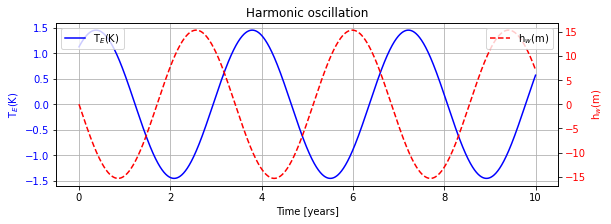

In [5]:
T_arr, h_arr =[],[]
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T$_E$(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T$_E$(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h$_w$(m)")
ax2.set_ylabel("h$_w$(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Harmonic oscillation")

# Task B mu >2/3 and mu < 2/3

In [6]:
mu=0.7
b=b0*mu
R=gama * b - c

Text(0.5, 1.0, 'Exploding oscillation')

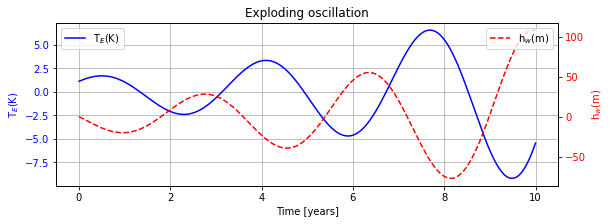

In [7]:
T_arr, h_arr =[],[]
T= T0
h = h0
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T$_E$(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T$_E$(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h$_w$(m)")
ax2.set_ylabel("h$_w$(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Exploding oscillation")

In [8]:
(R-r)/2

0.03125

In [9]:
mu=0.6
b=b0*mu
R=gama * b - c

Text(0.5, 1.0, 'Damping oscillation')

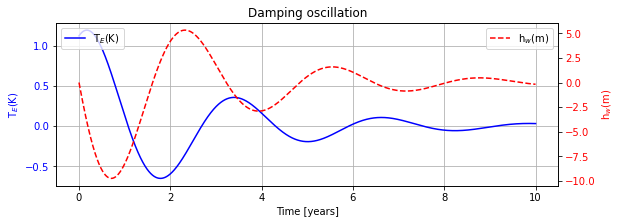

In [10]:
T_arr, h_arr =[],[]
T= T0
h = h0
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T$_E$(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T$_E$(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h$_w$(m)")
ax2.set_ylabel("h$_w$(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Damping oscillation")

# Task C    Turn on nonlinearity by setting ε = 0.1  mu=2/3

Text(0.5, 1.0, 'Adding nonlinearity for an unstable oscillation')

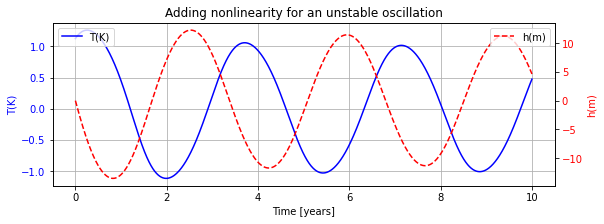

In [11]:
epsilon=1.2
mu=0.7
b=b0*mu
R=gama * b - c

T_arr, h_arr =[],[]
T= T0
h = h0
for i in range(0, n ):
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h(m)")
ax2.set_ylabel("h(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Adding nonlinearity for an unstable oscillation")

# Task D annual forcing

Text(0.5, 1.0, 'Adding annual cycle wind forcing')

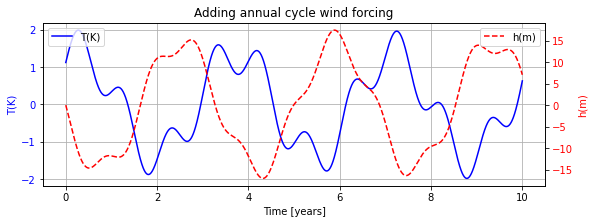

In [12]:
T=T0
h=h0
mu=2/3
b=b0*mu
R=gama * b - c
epsilon=0
f_ann=0.1
tao=12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr =[],[]  
for i in range(0, n ):
    xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao)
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
    
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h(m)")
ax2.set_ylabel("h(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Adding annual cycle wind forcing")

# Task E Random forcing

Text(0.5, 1.0, 'Stochastic forcing (white noise)')

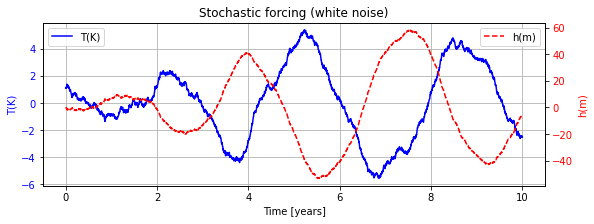

In [13]:
import random
T=T0
h=h0
mu=2/3
b=b0*mu
R=gama * b - c
epsilon=0
f_ann=0.1
f_ran=1
tao=12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr =[],[]
for i in range(0, n ):
    w=(2*random.random()-1)
    xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao) + f_ran*w
    #print(xi)
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
    
xlim = np.linspace(0,time,n)
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
color = 'b'
ax.plot(xlim*2/12, np.array(T_arr)*7.5, color=color,label="T(K)")
ax.set_xlabel('Time [years]')
ax.set_ylabel("T(K)",color=color)
ax.legend(loc='upper left')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'r'
ax2.plot(xlim*2/12, np.array(h_arr)*150,'--',color=color,label="h(m)")
ax2.set_ylabel("h(m)",color=color)
ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelcolor=color)
ax.grid()
plt.title("Stochastic forcing (white noise)")

Text(0.5, 1.0, 'a simulated 70-year time series of T with white noise')

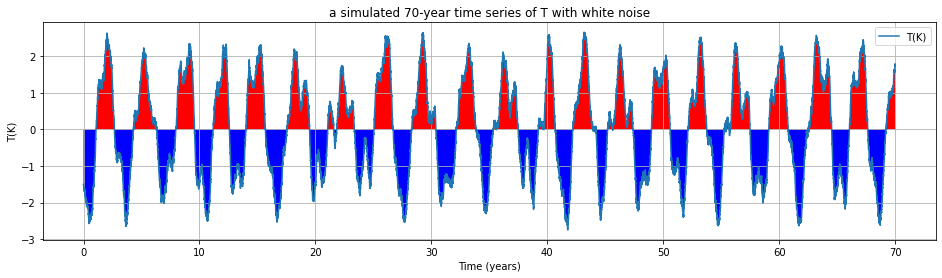

In [14]:
fig= plt.figure(figsize=(16,4))
time =120*7*30/60
n = int(time/dt)
xlim = np.linspace(0,time,n)
T=-1.5/7.5
h=h0
mu=0.75
b=b0*mu
R=gama * b - c
epsilon=0.6
f_ann=0.1
f_ran=0.5
tao=12*30/60 # 12 months.  must divide this by 2 months to non-dimensional
T_arr, h_arr =[],[]

for i in range(0, n ):
    w=(2*random.random()-1)
    xi = f_ann * np.cos(2*np.pi * (i+1) /60/tao) + f_ran*w
    #print(xi)
    T_arr.append(T)
    h_arr.append(h)
    T,h = rungeKutta(T,h)
plt.plot(xlim*2/12, np.array(T_arr)*7.5, label="T(K)")
x=xlim*2/12
y2=np.array(T_arr)*7.5
y1=0*y2
plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='red', interpolate=True)
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='blue', interpolate=True)
#plt.plot(xlim*2/12, np.array(h_arr)*15,'--',color="red",label="h$_w$(10m)")
plt.legend()
plt.grid()
plt.xlabel("Time (years)")
plt.ylabel("T(K)")
plt.title("a simulated 70-year time series of T with white noise")

In [15]:
'''
Some extra functions for Task F
'''

def Wgen():

    W = 0

    # generate a random number between zero and 1
    randnum = np.random.random_sample(1)
#     print(randnum)

    # randomly create a zero or one (flip a coin)
    binaryChoice = np.random.randint(0,2)
#     print(binaryChoice)

    if binaryChoice == 0:
        W = 0 - randnum

    if binaryChoice == 1:
        W = randnum
        
    return W

#     print(f'W: {W}')

'''
I have set up the following function to vary
- h between 0.0 and 0.3
- T between -0.15 and 0.15
'''

def randICs():

    h = 0
    T = 1.125
    
    placeholder = 0

    # generate two random numbers between zero and 1
    # this is done twice so that h and T aren't correlated
    randnumh = np.random.random_sample(1)
    randnumT = np.random.random_sample(1)
#     print(randnum)

    # randomly create a zero or one (flip a coin)
    binaryChoice = np.random.randint(0,2)
#     print(binaryChoice)

    if binaryChoice == 0:
        placeholder = 0 - randnumT

    if binaryChoice == 1:
        placeholder = randnumT
    
    # scale the result (for h)
    h = 0.3*randnumh
    T = 0.15*placeholder
    return h, T

In [16]:
randICs()

(array([0.25555716]), array([0.03379378]))

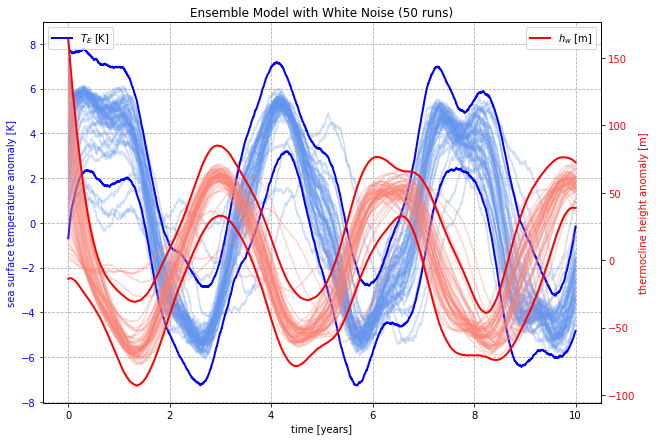

In [25]:
'''
Set range of initial values
'''

samples = 50
T_ensemble2 = np.linspace(0, 1,samples)
h_ensemble2 = np.linspace(0, 1, samples)

h_ensemble = np.zeros(samples)
T_ensemble = np.zeros(samples)

for i in range (samples):
    h_ensemble[i], T_ensemble[i] = randICs()

mu = 0.75
epsilon = 0.1
f_ann = 0.1
f_ran = 0.6
tau_cor = 1/60
tau = 6

# time parameters
years = 10
n = years*12/2
dt = 1/60
time = np.linspace(0,n,int(n/dt))
noTimeSteps = int(n/dt)

zetaRand = np.zeros([samples,len(time)])
T_array, h_array = [],[] 

holding_arrayT = np.zeros([samples,noTimeSteps])
CI_T = np.zeros([2,noTimeSteps])
CI_h = np.zeros([2,noTimeSteps])

T = T0
h = h0

'''
RK4 Method
'''

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

for j in range(samples):

    T_array, h_array = [], []
    T = T_ensemble2[j]
    h = h_ensemble2[j]
    
    for i in range(0, noTimeSteps):
        w = Wgen()
        xi = f_ann*np.cos(2*np.pi*time[i]/tau) + f_ran*w*tau_cor/dt
        T_array.append(T)
        h_array.append(h)
        T,h = rungeKutta(T,h)   
        
    holding_arrayT[j,:] = np.array(T_array)*7.5
    holding_arrayh[j,:] = np.array(h_array)*150

    ax.plot(time*2/12,np.array(T_array)*7.5,color='cornflowerblue',alpha=0.3)
    ax2.plot(time*2/12,np.array(h_array)*150,color='salmon',alpha=0.3)
    ax.set_xlabel('time [years]')
    ax.set_ylabel('sea surface temperature anomaly [K]',color='blue')
    ax2.set_ylabel('thermocline height anomaly [m]',color='red')
    
    
conlvl = 0.95  # 68% CI
dof = len(holding_arrayT[:,0])-1   
for i in range(0,noTimeSteps):
    CI_T[:,i] = st.t.interval(alpha=conlvl,df=dof,loc=np.mean(holding_arrayT[:,i]),scale=np.std(holding_arrayT[:,i]))
    CI_h[:,i] = st.t.interval(alpha=conlvl,df=dof,loc=np.mean(holding_arrayh[:,i]),scale=np.std(holding_arrayh[:,i]))
    

# '''
# Comment/uncomment to show the confidence interval in range of T and h
# '''
ax.plot(time*2/12,CI_T[0,:],color='b',linewidth=2,label='$T_E$ [K]')  
ax.plot(time*2/12,CI_T[1,:],color='b',linewidth=2)
ax.tick_params(axis='y',labelcolor='b')

ax2.plot(time*2/12,CI_h[0,:],color='red',linewidth=2,label=rf'$h_w$ [m]')  
ax2.plot(time*2/12,CI_h[1,:],color='red',linewidth=2)
ax2.tick_params(axis='y',labelcolor='r')

ax.grid(linestyle='--')
ax.legend(loc='upper left')
ax.set_title(fr'Ensemble Model with White Noise ({samples} runs)')
ax2.legend(loc='upper right')
plt.savefig(output+'taskF_ensembleWhiteNoise')    

# implement red noise for the ensemble model

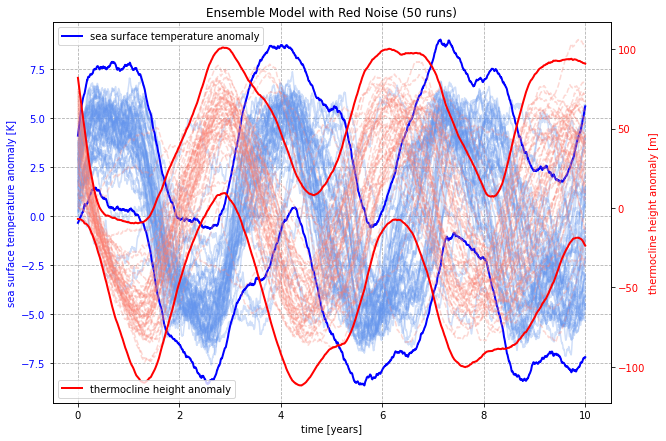

In [28]:
samples = 50
alpha1 = 0.67
zt = 0.5

T_ensemble2 = np.linspace(0, 0.5, samples)
h_ensemble2 = np.linspace(0, 0.5, samples)

mu = 0.75
epsilon = 0.1
f_ann = 0.1
f_ran = 0.6
tau_cor = 1/60
tau = 6

# Time Parameters
years = 10
n = years*12/2
dt = 1/60
time = np.linspace(0,n,int(n/dt))
noTimeSteps = int(n/dt)

zetaRand = np.zeros([samples,len(time)])
xi = 0
W = np.zeros([samples,len(time)])

T_array, h_array = [],[] 

holding_arrayT = np.zeros([samples,noTimeSteps])
holding_arrayh = np.zeros([samples,noTimeSteps])

CI_T = np.zeros([2,noTimeSteps])
CI_h = np.zeros([2,noTimeSteps])

T = T0
h = h0


fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

for j in range(samples):

    T_array, h_array = [], []
    T = T_ensemble2[j]
    h = h_ensemble2[j]
    
    W[:,0] = Wgen()
    T_array.append(T)
    h_array.append(h)
    T,h = rungeKutta(T,h) 
    
    for i in range(1, noTimeSteps):
        zt = Wgen()
        W[j,i] = W[j,i-1] * alpha1 + zt
        xi = f_ann*np.cos(2*np.pi*time[i]/tau) + f_ran*W[j,i]*tau_cor/dt
        T_array.append(T)
        h_array.append(h)
        T,h = rungeKutta(T,h)   
        
    holding_arrayT[j,:] = np.array(T_array)*7.5
    holding_arrayh[j,:] = np.array(h_array)*150

    ax.plot(time*2/12,np.array(T_array)*7.5,color='cornflowerblue',alpha=0.3)
    ax2.plot(time*2/12,np.array(h_array)*150,color='salmon',lineStyle='--',alpha=0.3)
    ax.set_xlabel('time [years]')
    ax.set_ylabel('sea surface temperature anomaly [K]',color='b')
    ax2.set_ylabel('thermocline height anomaly [m]',color='r')
    
    
conlvl = 0.95 # Confidence Level
dof = len(holding_arrayT[:,0])-1 # Degrees of Freedom (needed for Confidence Interval)   
for i in range(0,noTimeSteps):
    CI_T[:,i] = st.t.interval(alpha=conlvl,df=dof,loc=np.mean(holding_arrayT[:,i]),scale=np.std(holding_arrayT[:,i]))
    CI_h[:,i] = st.t.interval(alpha=conlvl,df=dof,loc=np.mean(holding_arrayh[:,i]),scale=np.std(holding_arrayh[:,i]))

ax.plot(time*2/12,CI_T[0,:],color='blue',linewidth=2,label='sea surface temperature anomaly')  
ax.plot(time*2/12,CI_T[1,:],color='blue',linewidth=2)
ax.grid(linestyle='--')
ax.tick_params(axis='y',labelcolor='b')
ax.legend(loc='upper left')
ax.set_title(rf'Ensemble Model with Red Noise ({samples} runs)')

ax2.plot(time*2/12,CI_h[0,:],color='red',linewidth=2,label='thermocline height anomaly')  
ax2.plot(time*2/12,CI_h[1,:],color='red',linewidth=2)
ax2.tick_params(axis='y',labelcolor='r')
ax2.legend(loc = 'lower left')

plt.savefig(output+'taskF_EnsembleRedNoise')

In [ ]:
'''
Set range of initial values
'''

samples = 50
alpha1 = 0.1
zt = 0.5


difference = 0.2
T_ensemble2 = np.linspace(0, 1,samples)
h_ensemble2 = np.linspace(0, 1, samples)

mu = 0.75
epsilon = 0.1
f_ann = 0.1
f_ran = 0.6
tau_cor = 1/60
tau = 6

# time parameters
n = 120*7*30/60
dt = 1/60
time = np.linspace(0,n,int(n/dt))
noTimeSteps = int(n/dt)

zetaRand = np.zeros([samples,len(time)])
xi = 0
W = np.zeros([samples,len(time)])

T_array, h_array = [],[] 

holding_arrayT = np.zeros([samples,noTimeSteps])

CI_T = np.zeros([2,noTimeSteps])
ensembleMean = np.zeros(noTimeSteps)

T = T0

'''
RK4 Method
'''

fig= plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)

for j in range(samples):

    T_array, h_array = [], []
    T = T_ensemble2[j]
    h = h_ensemble2[j]
    
    W[:,0] = Wgen()
    T_array.append(T)
    T,h = rungeKutta(T,h) 
    
    for i in range(1, noTimeSteps):
        zt = Wgen()
        W[j,i] = W[j,i-1] * alpha1 + zt
        xi = f_ann*np.cos(2*np.pi*time[i]/tau) + f_ran*W[j,i]*tau_cor/dt
        T_array.append(T)
#         h_array.append(h)
        T,h = rungeKutta(T,h)   
        
    holding_arrayT[j,:] = np.array(T_array)*7.5
    ax.plot(time*2/12,np.array(T_array)*7.5,color='cornflowerblue',alpha=0.3)
    ax.set_xlabel('time [years]')
    ax.set_ylabel('sea surface temperature anomaly [K]')
    
    
conlvl = 0.05  # 68% CI
dof = len(holding_arrayT[:,0])-1   
for i in range(0,noTimeSteps):
    ensembleMean[i] = np.mean(holding_arrayT[:,i])
    CI_T[:,i] = st.t.interval(alpha=conlvl,df=dof,loc=np.mean(holding_arrayT[:,i]),scale=np.std(holding_arrayT[:,i]))
  
'''
Comment/uncomment to show the confidence interval in range of T and h
'''
ax.plot(time*2/12,ensembleMean,color='black',lineWidth=2)

ax.grid(linestyle='--')
ax.legend(loc='upper left')
plt.title(rf'SST and thermocline height anomalies with RED noise and a uniform range of ICs ({samples} runs)')
plt.savefig(output+'70yearsplot')